In [2]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='C:\\Users\\Wang Zitao\\Desktop\\BEV\\lift-splat-shoot-annotated\data\\nuScenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.642 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [4]:
## scene_name description samples_date last_time position numbers_of_annotations

In [5]:
nusc.list_scenes()

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

In [6]:
## 查看第一个场景的具体信息

In [7]:
my_scene = nusc.scene[0]
my_scene

{'token': 'cc8c0bf57f984915a77078b10eb33198',
 'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'nbr_samples': 39,
 'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0',
 'name': 'scene-0061',
 'description': 'Parked truck, construction, intersection, turn left, following a van'}

In [8]:
## 获取该场景下第一个sample的token值

In [9]:
first_sample_token = my_scene['first_sample_token']
first_sample_token

'ca9a282c9e77460f8360f564131a8af5'

In [10]:
## 通过获取到的token值 查看该sample的信息

In [11]:
my_sample = nusc.get('sample', first_sample_token)
my_sample

{'token': 'ca9a282c9e77460f8360f564131a8af5',
 'timestamp': 1532402927647951,
 'prev': '',
 'next': '39586f9d59004284a7114a68825e8eec',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
  'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
  'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
  'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
  'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
  'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
  'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
  'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
  'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
  'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
  'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
  'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
 'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319

In [12]:
## 样本数据 sample_data

In [13]:
my_sample['data']

{'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
 'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
 'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
 'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
 'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
 'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
 'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
 'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
 'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
 'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
 'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
 'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'}

In [14]:
## 可视化
## 以RADAR_FRONT为例

In [16]:
sensor_radar = 'RADAR_FRONT'
radar_front_data = nusc.get('sample_data',my_sample['data'][sensor_radar])  
radar_front_data

{'token': '37091c75b9704e0daa829ba56dfa0906',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': '37091c75b9704e0daa829ba56dfa0906',
 'calibrated_sensor_token': 'f4d2a6c281f34a7eb8bb033d82321f79',
 'timestamp': 1532402927664178,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/RADAR_FRONT/n015-2018-07-24-11-22-45+0800__RADAR_FRONT__1532402927664178.pcd',
 'prev': '',
 'next': 'f0b8593e08594a3eb1152c138b312813',
 'sensor_modality': 'radar',
 'channel': 'RADAR_FRONT'}

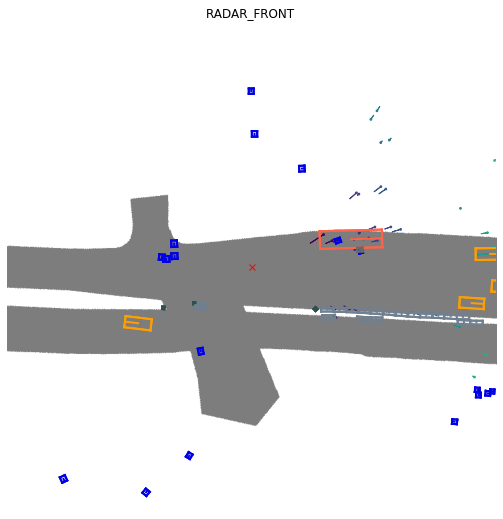

In [17]:
nusc.render_sample_data(radar_front_data['token'])

In [18]:
## 样本标注 sample_annotation

In [19]:
my_annotation_token = my_sample['anns'][18]
my_annotation_metadata = nusc.get('sample_annotation',my_annotation_token)
my_annotation_metadata

{'token': '83d881a6b3d94ef3a3bc3b585cc514f8',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'instance_token': 'e91afa15647c4c4994f19aeb302c7179',
 'visibility_token': '4',
 'attribute_tokens': ['58aa28b1c2a54dc88e169808c07331e3'],
 'translation': [409.989, 1164.099, 1.623],
 'size': [2.877, 10.201, 3.595],
 'rotation': [-0.5828819500503033, 0.0, 0.0, 0.812556848660791],
 'prev': '',
 'next': 'f3721bdfd7ee4fd2a4f94874286df471',
 'num_lidar_pts': 495,
 'num_radar_pts': 13,
 'category_name': 'vehicle.truck'}

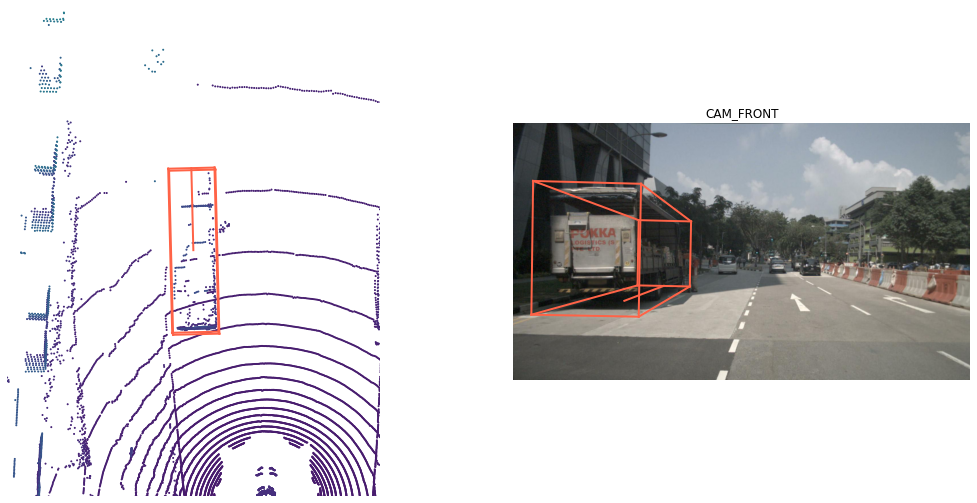

In [20]:
nusc.render_annotation(my_annotation_metadata['token'])

In [21]:
## 实例 instance

In [22]:
my_instance = nusc.instance[0]
my_instance

{'token': '6dd2cbf4c24b4caeb625035869bca7b5',
 'category_token': '1fa93b757fc74fb197cdd60001ad8abf',
 'nbr_annotations': 39,
 'first_annotation_token': 'ef63a697930c4b20a6b9791f423351da',
 'last_annotation_token': '8bb63134d48840aaa2993f490855ff0d'}

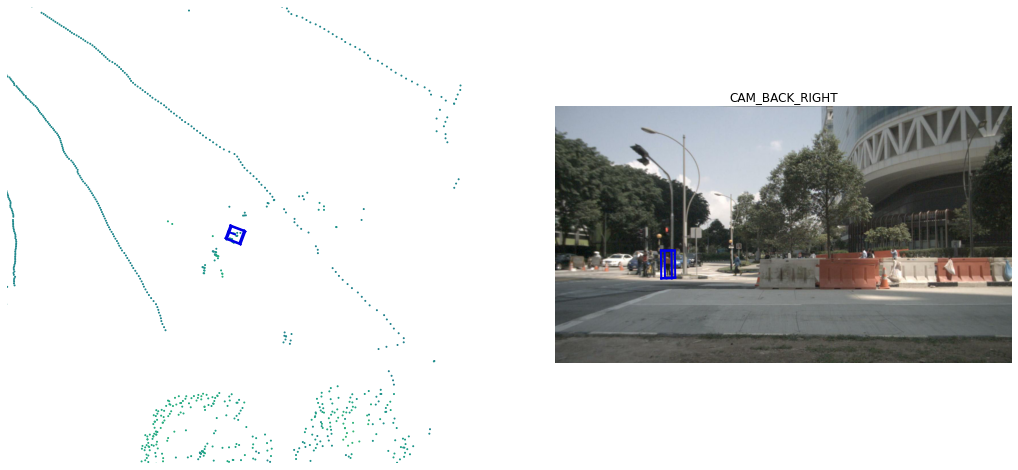

In [23]:
instance_token = my_instance['token']
nusc.render_instance(instance_token)

In [24]:
## 类别 categories

In [25]:
nusc.list_categories()

Category stats for split v1.0-mini:
human.pedestrian.adult      n= 4765, width= 0.68±0.11, len= 0.73±0.17, height= 1.76±0.12, lw_aspect= 1.08±0.23
human.pedestrian.child      n=   46, width= 0.46±0.08, len= 0.45±0.09, height= 1.37±0.06, lw_aspect= 0.97±0.05
human.pedestrian.constructi n=  193, width= 0.69±0.07, len= 0.74±0.12, height= 1.78±0.05, lw_aspect= 1.07±0.16
human.pedestrian.personal_m n=   25, width= 0.83±0.00, len= 1.28±0.00, height= 1.87±0.00, lw_aspect= 1.55±0.00
human.pedestrian.police_off n=   11, width= 0.59±0.00, len= 0.47±0.00, height= 1.81±0.00, lw_aspect= 0.80±0.00
movable_object.barrier      n= 2323, width= 2.32±0.49, len= 0.61±0.11, height= 1.06±0.10, lw_aspect= 0.28±0.09
movable_object.debris       n=   13, width= 0.43±0.00, len= 1.43±0.00, height= 0.46±0.00, lw_aspect= 3.35±0.00
movable_object.pushable_pul n=   82, width= 0.51±0.06, len= 0.79±0.10, height= 1.04±0.20, lw_aspect= 1.55±0.18
movable_object.trafficcone  n= 1378, width= 0.47±0.14, len= 0.45±0.07, heigh

In [26]:
nusc.category[0]

{'token': '1fa93b757fc74fb197cdd60001ad8abf',
 'name': 'human.pedestrian.adult',
 'description': 'Adult subcategory.'}

In [27]:
## 属性 attributes

In [28]:
nusc.list_attributes()

cycle.with_rider: 305
cycle.without_rider: 434
pedestrian.moving: 3875
pedestrian.sitting_lying_down: 111
pedestrian.standing: 1029
vehicle.moving: 2715
vehicle.parked: 4674
vehicle.stopped: 1545


In [29]:
my_instance = nusc.instance[27]
first_token = my_instance['first_annotation_token']
last_token = my_instance['last_annotation_token']
nbr_samples = my_instance['nbr_annotations']
current_token = first_token

i = 0
found_change = False
while current_token != last_token:
    current_ann = nusc.get('sample_annotation', current_token)
    current_attr = nusc.get('attribute', current_ann['attribute_tokens'][0])['name']
    
    if i == 0:
        pass
    elif current_attr != last_attr:
        print("Changed from `{}` to `{}` at timestamp {} out of {} annotated timestamps".format(last_attr, current_attr, i, nbr_samples))
        found_change = True

    next_token = current_ann['next']
    current_token = next_token
    last_attr = current_attr
    i += 1

Changed from `pedestrian.moving` to `pedestrian.standing` at timestamp 21 out of 39 annotated timestamps


In [30]:
## 可视化 visibility

Visibility: {'description': 'visibility of whole object is between 80 and 100%', 'token': '4', 'level': 'v80-100'}


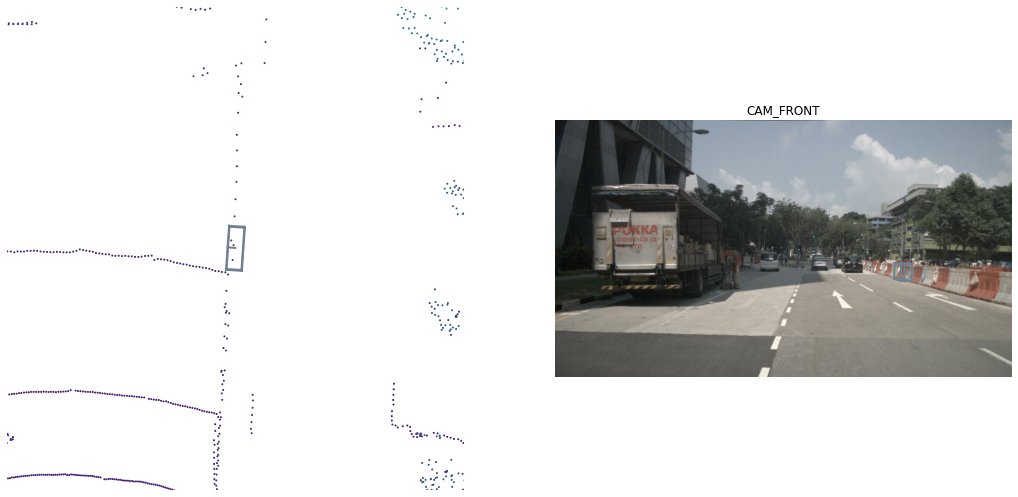

In [31]:
anntoken = my_sample['anns'][9]
visibility_token = nusc.get('sample_annotation', anntoken)['visibility_token']
print("Visibility: {}".format(nusc.get('visibility', visibility_token)))
nusc.render_annotation(anntoken)

In [32]:
## sensors

In [33]:
nusc.sensor

[{'token': '725903f5b62f56118f4094b46a4470d8',
  'channel': 'CAM_FRONT',
  'modality': 'camera'},
 {'token': 'ce89d4f3050b5892b33b3d328c5e82a3',
  'channel': 'CAM_BACK',
  'modality': 'camera'},
 {'token': 'a89643a5de885c6486df2232dc954da2',
  'channel': 'CAM_BACK_LEFT',
  'modality': 'camera'},
 {'token': 'ec4b5d41840a509984f7ec36419d4c09',
  'channel': 'CAM_FRONT_LEFT',
  'modality': 'camera'},
 {'token': '2f7ad058f1ac5557bf321c7543758f43',
  'channel': 'CAM_FRONT_RIGHT',
  'modality': 'camera'},
 {'token': 'ca7dba2ec9f95951bbe67246f7f2c3f7',
  'channel': 'CAM_BACK_RIGHT',
  'modality': 'camera'},
 {'token': 'dc8b396651c05aedbb9cdaae573bb567',
  'channel': 'LIDAR_TOP',
  'modality': 'lidar'},
 {'token': '47fcd48f71d75e0da5c8c1704a9bfe0a',
  'channel': 'RADAR_FRONT',
  'modality': 'radar'},
 {'token': '232a6c4dc628532e81de1c57120876e9',
  'channel': 'RADAR_FRONT_RIGHT',
  'modality': 'radar'},
 {'token': '1f69f87a4e175e5ba1d03e2e6d9bcd27',
  'channel': 'RADAR_FRONT_LEFT',
  'modality'

In [34]:
## sample_data contains the info of the sensors

In [35]:
nusc.sample_data[0]

{'token': '5ace90b379af485b9dcb1584b01e7212',
 'sample_token': '39586f9d59004284a7114a68825e8eec',
 'ego_pose_token': '5ace90b379af485b9dcb1584b01e7212',
 'calibrated_sensor_token': 'f4d2a6c281f34a7eb8bb033d82321f79',
 'timestamp': 1532402927814384,
 'fileformat': 'pcd',
 'is_key_frame': False,
 'height': 0,
 'width': 0,
 'filename': 'sweeps/RADAR_FRONT/n015-2018-07-24-11-22-45+0800__RADAR_FRONT__1532402927814384.pcd',
 'prev': 'f0b8593e08594a3eb1152c138b312813',
 'next': '978db2bcdf584b799c13594a348576d2',
 'sensor_modality': 'radar',
 'channel': 'RADAR_FRONT'}

In [36]:
## 校准传感器 calibrated_sensor

In [37]:
sensor_token = nusc.calibrated_sensor[0]
sensor_token

{'token': 'f4d2a6c281f34a7eb8bb033d82321f79',
 'sensor_token': '47fcd48f71d75e0da5c8c1704a9bfe0a',
 'translation': [3.412, 0.0, 0.5],
 'rotation': [0.9999984769132877, 0.0, 0.0, 0.0017453283658983088],
 'camera_intrinsic': []}

In [38]:
## 车辆姿态 ego_pose

In [39]:
nusc.ego_pose[0]

{'token': '5ace90b379af485b9dcb1584b01e7212',
 'timestamp': 1532402927814384,
 'rotation': [0.5731787718287827,
  -0.0015811634307974854,
  0.013859363182046986,
  -0.8193116095230444],
 'translation': [410.77878632230204, 1179.4673290964536, 0.0]}

In [40]:
## log
nusc.log[0]

{'token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'logfile': 'n015-2018-07-24-11-22-45+0800',
 'vehicle': 'n015',
 'date_captured': '2018-07-24',
 'location': 'singapore-onenorth',
 'map_token': '53992ee3023e5494b90c316c183be829'}

In [41]:
## map
nusc.map[0]

{'category': 'semantic_prior',
 'token': '53992ee3023e5494b90c316c183be829',
 'filename': 'maps/53992ee3023e5494b90c316c183be829.png',
 'log_tokens': ['0986cb758b1d43fdaa051ab23d45582b',
  '1c9b302455ff44a9a290c372b31aa3ce',
  'e60234ec7c324789ac7c8441a5e49731',
  '46123a03f41e4657adc82ed9ddbe0ba2',
  'a5bb7f9dd1884f1ea0de299caefe7ef4',
  'bc41a49366734ebf978d6a71981537dc',
  'f8699afb7a2247e38549e4d250b4581b',
  'd0450edaed4a46f898403f45fa9e5f0d',
  'f38ef5a1e9c941aabb2155768670b92a',
  '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
  'ddc03471df3e4c9bb9663629a4097743',
  '31e9939f05c1485b88a8f68ad2cf9fa4',
  '783683d957054175bda1b326453a13f4',
  '343d984344e440c7952d1e403b572b2a',
  '92af2609d31445e5a71b2d895376fed6',
  '47620afea3c443f6a761e885273cb531',
  'd31dc715d1c34b99bd5afb0e3aea26ed',
  '34d0574ea8f340179c82162c6ac069bc',
  'd7fd2bb9696d43af901326664e42340b',
  'b5622d4dcb0d4549b813b3ffb96fbdc9',
  'da04ae0b72024818a6219d8dd138ea4b',
  '6b6513e6c8384cec88775cae30b78c0e',
  'eda311bda86f

In [57]:
import torch

In [58]:
print(torch.__version__)

1.13.0+cpu


In [59]:
print('gpu',torch.cuda.is_available())

gpu False
